In [24]:
import pandas as pd
import numpy as np
import scanpy as sc

In [25]:
granger_df_all_T = pd.read_csv('../results_final_Jan15/granger_draft_T_signed_score.csv', index_col=0)
granger_df_all_A = pd.read_csv('../results_final_Jan15/granger_draft_A_signed_score.csv', index_col=0)

In [26]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [27]:
# draft_matrix = pd.read_csv('../data/new_all_pval.csv', index_col=0)

In [28]:
# draft_matrix

# hvg_50 = [c.strip('_y') for c in draft_matrix.columns]
# hv_tf_50 = [c.strip('_x') for c in draft_matrix.index]

In [29]:
# print(len(hvg_50))
# print(len(hv_tf_50))

In [30]:
# with open('../data/hvg_50.txt', 'r') as f:
#     hvg_50 = f.read().splitlines()

# with open('../data/hv_tf_50.txt', 'r') as f:
#     hv_tf_50 = f.read().splitlines()

In [31]:
# granger_df_50_T = granger_df_all_T.loc[hv_tf_50, hvg_50]
# granger_df_50_T.to_csv('../results_final_Jan15/granger_draft_T_signed_score.csv')
# granger_df_50_A = granger_df_all_A.loc[hv_tf_50, hvg_50]
# granger_df_50_A.to_csv('../results_final_Jan15/granger_draft_A_signed_score.csv')

granger_df_50_T = granger_df_all_T
granger_df_50_A = granger_df_all_A

In [32]:
# Convert to pairs with values for T
pairs = [(idx, col, val) for idx in granger_df_50_T.index for col, val in granger_df_50_T.abs().loc[idx].items()]

# Sort by absolute value
pairs.sort(key=lambda x: x[2], reverse=True)

# Get top pairs until we have 100 unique indices
seen_indices = set()
top_pairs = []
for idx, col, val in pairs:
    if idx not in seen_indices:
        seen_indices.add(idx)
        top_pairs.append((idx, col, val))
    if len(seen_indices) == 100:
        break

# Convert result to DataFrame for easier viewing
result = pd.DataFrame(top_pairs, columns=['Index', 'Column', 'Value'])
top_100_T = result['Index'].to_list()

# Now do the same for A
pairs = [(idx, col, val) for idx in granger_df_50_A.index for col, val in granger_df_50_A.abs().loc[idx].items()]

pairs.sort(key=lambda x: x[2], reverse=True)

seen_indices = set()
top_pairs = []
for idx, col, val in pairs:
    if idx not in seen_indices:
        seen_indices.add(idx)
        top_pairs.append((idx, col, val))
    if len(seen_indices) == 100:
        break

result_A = pd.DataFrame(top_pairs, columns=['Index', 'Column', 'Value'])
top_100_A = result_A['Index'].to_list()

In [33]:
# Find intersection between top 100 genes from T and A
intersection = set(top_100_T) & set(top_100_A)
print(f"Number of genes in intersection: {len(intersection)}")

Number of genes in intersection: 64


In [34]:
unique_T = set(top_100_T) - intersection
unique_A = set(top_100_A) - intersection
intersection_list = list(intersection)
unique_T_list = list(unique_T)
unique_A_list = list(unique_A)



In [35]:
len(intersection)

64

In [36]:
# Create a dictionary of dataframes for each list
data_dict = {
    'Unique_T': pd.DataFrame(unique_T_list, columns=['Gene']),
    'Unique_A': pd.DataFrame(unique_A_list, columns=['Gene']), 
    'Intersection': pd.DataFrame(intersection_list, columns=['Gene']),
    'Top_100_T': pd.DataFrame(top_100_T, columns=['Gene']),
    'Top_100_A': pd.DataFrame(top_100_A, columns=['Gene'])
}

# Save to Excel with multiple sheets
with pd.ExcelWriter('../results_final_Jan15/granger_causality_rankings_draft.xlsx') as writer:
    for sheet_name, df in data_dict.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [37]:
# Convert to pairs with values for T
pairs = [(idx, col, val) for idx in granger_df_50_T.index for col, val in granger_df_50_T.abs().loc[idx].items()]

# Sort by absolute value
pairs.sort(key=lambda x: x[2], reverse=True)
import copy
pairs_T = copy.deepcopy(pairs)
# Get top pairs until we have 100 unique indices
seen_indices = set()
top_pairs = []
top_pairs_T = []
for idx, col, val in pairs:
    if idx not in seen_indices:
        seen_indices.add(idx)
        top_pairs.append((idx, col, val))
    top_pairs_T.append((idx, col, val))
    if len(seen_indices) == 100 + 1:
        break

# Convert result to DataFrame for easier viewing
result = pd.DataFrame(top_pairs, columns=['Index', 'Column', 'Value'])
top_100_T = result['Index'].to_list()

# Now do the same for A
pairs = [(idx, col, val) for idx in granger_df_50_A.index for col, val in granger_df_50_A.abs().loc[idx].items()]

pairs.sort(key=lambda x: x[2], reverse=True)

seen_indices = set()
top_pairs_A = []
for idx, col, val in pairs:
    if idx not in seen_indices:
        seen_indices.add(idx)
        top_pairs_A.append((idx, col, val))
    if len(seen_indices) == 100 + 1:
        break

result_A = pd.DataFrame(top_pairs, columns=['Index', 'Column', 'Value'])
top_100_A = result_A['Index'].to_list()

In [38]:
pairs_T_df = pd.DataFrame(top_pairs_T, columns=['Index', 'Column', 'Value'])
pairs_T_df = pairs_T_df.drop(pairs_T_df.index[-1])
pairs_T_df = pairs_T_df[pairs_T_df['Index'].isin(unique_T_list)]
pairs_T_df.rename(columns={'Index': 'TF', 'Column': 'Gene'}, inplace=True)
# pairs_T_df.to_csv('../results_final_Jan30/granger_draft_top_unique_T_pairs.csv', index=False)

pairs_A_df = pd.DataFrame(top_pairs_A, columns=['Index', 'Column', 'Value'])
pairs_A_df = pairs_A_df.drop(pairs_A_df.index[-1])
pairs_A_df = pairs_A_df[pairs_A_df['Index'].isin(unique_A_list)]
pairs_A_df.rename(columns={'Index': 'TF', 'Column': 'Gene'}, inplace=True)
pairs_A_df.to_csv('../results_Jun2_suppl/granger_draft_top_unique_A_pairs.csv', index=False)


In [39]:
# cluster_df = pd.read_csv('../results_final_Jan30/cluster_df_extreme_T_draft.csv', index_col=0)
# cluster_unique_T = cluster_df.loc[cluster_df.index.isin(unique_T_list), 'cluster']
# cluster_unique_T.to_csv('../results_final_Jan30/cluster_unique_T_draft.csv')

cluster_df = pd.read_csv('../results_Jun2_suppl/cluster_df_extreme_A_draft.csv', index_col=0)
cluster_unique_A = cluster_df.loc[cluster_df.index.isin(unique_A_list), 'cluster']
cluster_unique_A.to_csv('../results_Jun2_suppl/cluster_unique_A_draft.csv')


In [40]:
unique_A_list

['HSF2',
 'GTF2IRD1',
 'AHR',
 'ZNF680',
 'ZNF654',
 'MAFK',
 'TCF7L1',
 'PLSCR1',
 'ZNF107',
 'HOXA4',
 'EN1',
 'KLF3',
 'FOXJ3',
 'ANKZF1',
 'GTF2IRD2B',
 'GATAD2B',
 'IRF1',
 'DLX5',
 'PLAGL1',
 'MSX1',
 'DMTF1',
 'KLF7',
 'ZNF518B',
 'ZNF512',
 'FOXK1',
 'CSRNP1',
 'FOXC1',
 'HOXA3',
 'NFE2L3',
 'ZNF92',
 'ARID5A',
 'DLX6',
 'AEBP1',
 'HIVEP2',
 'HLX',
 'ETV1']

In [41]:
cluster_unique_A.value_counts().sort_index()

0.0     8
1.0     4
2.0     1
3.0     8
4.0    15
Name: cluster, dtype: int64

In [17]:
# # Convert to pairs with values for T
# pairs = [(idx, col, val) for idx in granger_df_50_T.index for col, val in granger_df_50_T.abs().loc[idx].items()]

# # Sort by absolute value
# pairs.sort(key=lambda x: x[2], reverse=True)

# # Get top pairs until we have 200 unique indices
# seen_indices = set()
# top_pairs = []
# for idx, col, val in pairs:
#     if idx not in seen_indices:
#         seen_indices.add(idx)
#         top_pairs.append((idx, col, val))
#     if len(seen_indices) == 200:
#         break

# # Convert result to DataFrame for easier viewing
# result = pd.DataFrame(top_pairs, columns=['Index', 'Column', 'Value'])
# top_200_T = result['Index'].to_list()

# # Now do the same for A
# pairs = [(idx, col, val) for idx in granger_df_50_A.index for col, val in granger_df_50_A.abs().loc[idx].items()]

# pairs.sort(key=lambda x: x[2], reverse=True)

# seen_indices = set()
# top_pairs = []
# for idx, col, val in pairs:
#     if idx not in seen_indices:
#         seen_indices.add(idx)
#         top_pairs.append((idx, col, val))
#     if len(seen_indices) == 200:
#         break

# result_A = pd.DataFrame(top_pairs, columns=['Index', 'Column', 'Value'])
# top_200_A = result_A['Index'].to_list()

# # Find intersection between top 200 genes from T and A
# intersection = set(top_200_T) & set(top_200_A)
# print(f"Number of genes in intersection: {len(intersection)}")

# unique_T = set(top_200_T) - intersection
# unique_A = set(top_200_A) - intersection
# intersection_list = list(intersection)
# unique_T_list = list(unique_T)
# unique_A_list = list(unique_A)


# # Create a dictionary of dataframes for each list
# data_dict = {
#     'Unique_T': pd.DataFrame(unique_T_list, columns=['Gene']),
#     'Unique_A': pd.DataFrame(unique_A_list, columns=['Gene']), 
#     'Intersection': pd.DataFrame(intersection_list, columns=['Gene']),
#     'Top_200_T': pd.DataFrame(top_200_T, columns=['Gene']),
#     'Top_200_A': pd.DataFrame(top_200_A, columns=['Gene'])
# }

# # Save to Excel with multiple sheets
# with pd.ExcelWriter('../results_final_Jan15/granger_causality_rankings_50_top200.xlsx') as writer:
#     for sheet_name, df in data_dict.items():
#         df.to_excel(writer, sheet_name=sheet_name, index=False)

# # Convert gene names to IDs
# data_dict_ids = {}
# for name, df in data_dict.items():
#     df_ids = df.copy()
#     df_ids['Gene'] = df_ids['Gene'].map(gene_name2id)
#     data_dict_ids[name] = df_ids

# # Save version with gene IDs to Excel
# with pd.ExcelWriter('../results_final_Jan15/granger_causality_rankings_50_top200_ids.xlsx') as writer:
#     for sheet_name, df in data_dict_ids.items():
#         df.to_excel(writer, sheet_name=sheet_name, index=False)

In [18]:
# print(len(unique_T_list))

In [19]:
# # Convert to pairs with values for T
# pairs = [(idx, col, val) for idx in granger_df_50_T.index for col, val in granger_df_50_T.abs().loc[idx].items()]

# # Sort by absolute value
# pairs.sort(key=lambda x: x[2], reverse=True)

# # Get top pairs until we have 300 unique indices
# seen_indices = set()
# top_pairs = []
# for idx, col, val in pairs:
#     if idx not in seen_indices:
#         seen_indices.add(idx)
#         top_pairs.append((idx, col, val))
#     if len(seen_indices) == 300:
#         break

# # Convert result to DataFrame for easier viewing
# result = pd.DataFrame(top_pairs, columns=['Index', 'Column', 'Value'])
# top_300_T = result['Index'].to_list()

# # Now do the same for A
# pairs = [(idx, col, val) for idx in granger_df_50_A.index for col, val in granger_df_50_A.abs().loc[idx].items()]

# pairs.sort(key=lambda x: x[2], reverse=True)

# seen_indices = set()
# top_pairs = []
# for idx, col, val in pairs:
#     if idx not in seen_indices:
#         seen_indices.add(idx)
#         top_pairs.append((idx, col, val))
#     if len(seen_indices) == 300:
#         break

# result_A = pd.DataFrame(top_pairs, columns=['Index', 'Column', 'Value'])
# top_300_A = result_A['Index'].to_list()

# # Find intersection between top 300 genes from T and A
# intersection = set(top_300_T) & set(top_300_A)
# print(f"Number of genes in intersection: {len(intersection)}")

# unique_T = set(top_300_T) - intersection
# unique_A = set(top_300_A) - intersection
# intersection_list = list(intersection)
# unique_T_list = list(unique_T)
# unique_A_list = list(unique_A)


# # Create a dictionary of dataframes for each list
# data_dict = {
#     'Unique_T': pd.DataFrame(unique_T_list, columns=['Gene']),
#     'Unique_A': pd.DataFrame(unique_A_list, columns=['Gene']), 
#     'Intersection': pd.DataFrame(intersection_list, columns=['Gene']),
#     'Top_300_T': pd.DataFrame(top_300_T, columns=['Gene']),
#     'Top_300_A': pd.DataFrame(top_300_A, columns=['Gene'])
# }

# # Save to Excel with multiple sheets
# with pd.ExcelWriter('../results_final_Jan15/granger_causality_rankings_50_top300.xlsx') as writer:
#     for sheet_name, df in data_dict.items():
#         df.to_excel(writer, sheet_name=sheet_name, index=False)

# # Convert gene names to IDs
# data_dict_ids = {}
# for name, df in data_dict.items():
#     df_ids = df.copy()
#     df_ids['Gene'] = df_ids['Gene'].map(gene_name2id)
#     data_dict_ids[name] = df_ids

# # Save version with gene IDs to Excel
# with pd.ExcelWriter('../results_final_Jan15/granger_causality_rankings_50_top300_ids.xlsx') as writer:
#     for sheet_name, df in data_dict_ids.items():
#         df.to_excel(writer, sheet_name=sheet_name, index=False)

In [20]:
# print(len(unique_T_list))

In [42]:
draft_matrix = pd.read_excel('../data/top_regulated_genes_48_epi_tfs.xlsx', index_col=0)


In [43]:
before48_tfs = [c.strip('_x') for c in draft_matrix.columns]
before48_genes = [c.strip('_y') for c in draft_matrix.index]
intersection = set(before48_tfs) & set(unique_T_list)
print(len(intersection))


5


In [47]:
import scanpy as sc


from sklearn.preprocessing import StandardScaler
import seaborn as sns

adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
gene_names = adata.var_names.to_numpy()

traj = np.load(f"../results_final_Dec22/traj_gene_space_A_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
# alex_genes = open('../data/alex_genes.txt').read().splitlines()
# alex_tfs = open('../data/alex_tfs.txt').read().splitlines()

alex_genes = granger_df_all_A.columns.to_list()
alex_tfs = granger_df_all_A.index.to_list()

alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))
trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T

# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-1])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]

signed_score_df = granger_df_all_A

# Extract valid names for columns and rows
valid_cols = [name for name in trends_df_sorted.index if name in signed_score_df.columns]
valid_rows = [name for name in trends_df_sorted.index if name in signed_score_df.index]

# Reorder the DataFrame
df_reordered = signed_score_df.loc[valid_rows, valid_cols]

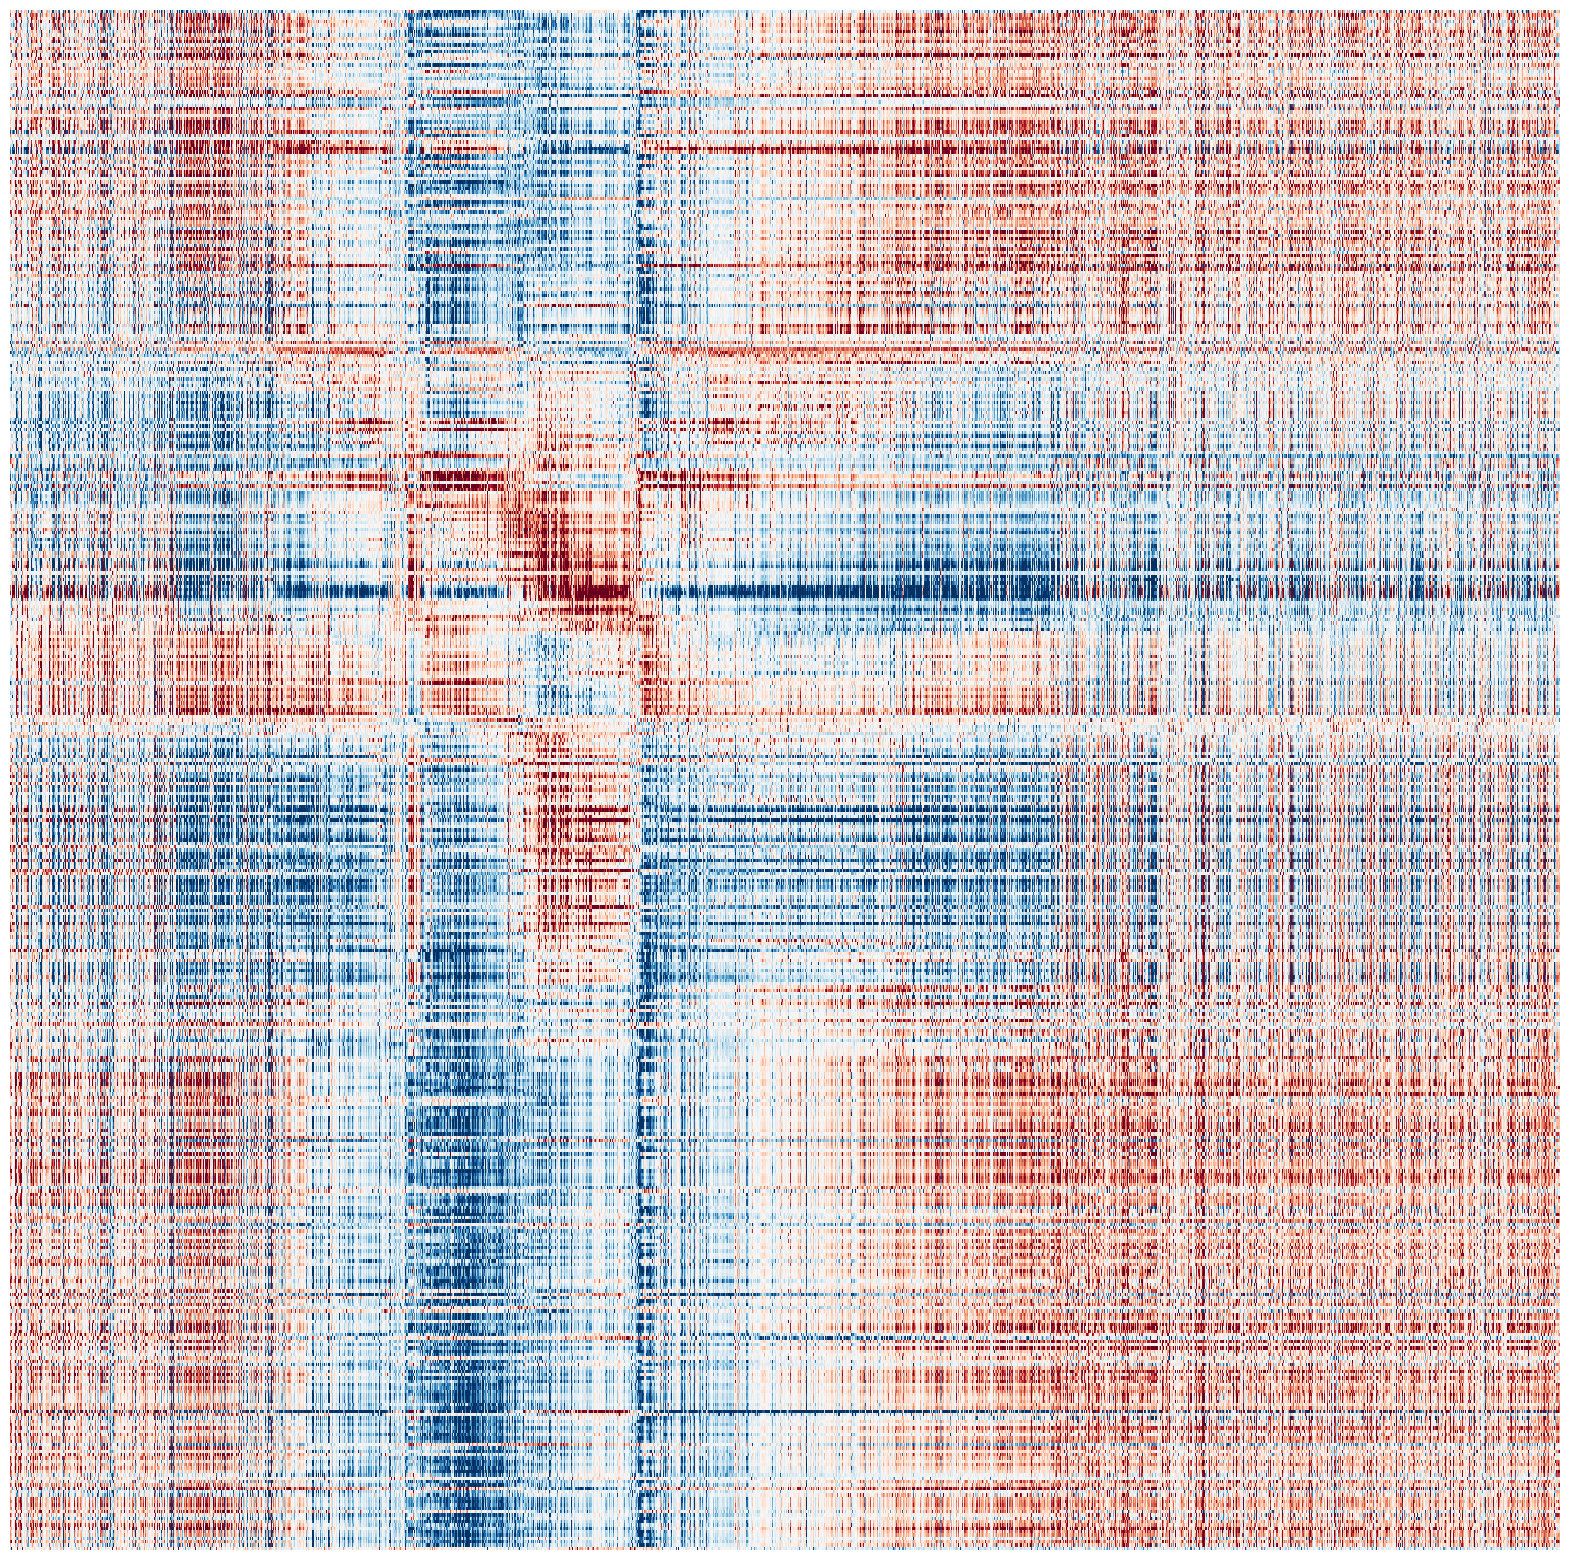

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(df_reordered, cmap='RdBu_r', center=0)
plt.xticks([])
plt.yticks([])
plt.gca().collections[0].colorbar.remove()
plt.savefig('../results_Jun2_suppl/granger_draft_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()




In [49]:
df_reordered.to_csv('../results_Jun2_suppl/granger_draft_heatmap_df_reordered.csv')